### Importing basic libraries

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config Completer.use_jedi = False # this speeds up autocomplete

### Creating a pd.DataFrame from a dictionary

In [8]:
# Pre-defined lists
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr =  [True, False, False, False, True, True, True]
cpc = [809, 731, 588, 18, 200, 70, 45]

# Create dictionary my_dict with three key:value pairs: my_dict
my_dict = {'country':names, 'drives_right':dr, 'cars_per_cap':cpc}

# Build a DataFrame cars from my_dict: cars
cars = pd.DataFrame(my_dict)

# Print cars
print(cars)

         country  drives_right  cars_per_cap
0  United States          True           809
1      Australia         False           731
2          Japan         False           588
3          India         False            18
4         Russia          True           200
5        Morocco          True            70
6          Egypt          True            45


In [9]:
# Definition of row_labels
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

# Specify row labels of cars
cars.index = row_labels

# Print cars
print(cars)

           country  drives_right  cars_per_cap
US   United States          True           809
AUS      Australia         False           731
JPN          Japan         False           588
IN           India         False            18
RU          Russia          True           200
MOR        Morocco          True            70
EG           Egypt          True            45


### Getting initial information

In [10]:
# Initial information
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, US to EG
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country       7 non-null      object
 1   drives_right  7 non-null      bool  
 2   cars_per_cap  7 non-null      int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 175.0+ bytes


In [11]:
# Getting column names
cars.columns

Index(['country', 'drives_right', 'cars_per_cap'], dtype='object')

In [12]:
# Getting index info
cars.index

Index(['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG'], dtype='object')

In [13]:
# Return only the first rows
cars.head()

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200


In [14]:
# What's the shape of the data?
cars.shape

(7, 3)

In [15]:
# Describing numerical variables
cars.describe()

,cars_per_cap
count,7.000000
mean,351.571429
std,345.595552
min,18.000000
25%,57.500000
50%,200.000000
75%,659.500000
max,809.000000


In [16]:
# Getting values by list
cars.values

array([['United States', True, 809],
       ['Australia', False, 731],
       ['Japan', False, 588],
       ['India', False, 18],
       ['Russia', True, 200],
       ['Morocco', True, 70],
       ['Egypt', True, 45]], dtype=object)

#### Index operations

In [17]:
# Setting a column as index
cars_ind = cars.set_index('country')
cars_ind

,drives_right,cars_per_cap
country,,
United States,True,809
Australia,False,731
Japan,False,588
India,False,18
Russia,True,200
Morocco,True,70
Egypt,True,45


In [18]:
# Resetting index
cars = cars_ind.reset_index()
cars

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


In [19]:
# Resetting index & dropping index column
cars_ind = cars_ind.reset_index(drop = True)
cars_ind

,drives_right,cars_per_cap
0,True,809
1,False,731
2,False,588
3,False,18
4,True,200
5,True,70
6,True,45


In [20]:
# Creating multilevel indexes
cars_ind = cars.set_index(['country', 'drives_right'])
cars_ind

,,cars_per_cap
country,drives_right,
United States,True,809
Australia,False,731
Japan,False,588
India,False,18
Russia,True,200
Morocco,True,70
Egypt,True,45


In [21]:
# Sorting by multilevel index
cars_ind = cars_ind.sort_index(level = ['country', 'drives_right'],
                               ascending = [True, False]
                              )
cars_ind

,,cars_per_cap
country,drives_right,
Australia,False,731
Egypt,True,45
India,False,18
Japan,False,588
Morocco,True,70
Russia,True,200
United States,True,809


### Creating a pd.DataFrame from a .csv

In [22]:
# Importing a .csv from a url
url = 'https://raw.githubusercontent.com/GabrielReisR/R/master/estrutura%20de%20dados/dados/libraries.csv'
libraries = pd.read_csv(url, encoding = 'latin_1')



In [23]:
# Fixing the indexing
libraries = pd.read_csv(url, encoding = 'latin_1', index_col = 0)

libraries.head()

,Country,Region,Expenditures \r\r\n(US Dollars),Total Libraries,Total Librarians,Total Volumes,Total Users
1,Afghanistan,Asia,NaN,150,NaN,577300,48133.0
2,Albania,Europe,134036.0,2107,32.0,12398795,581298.0
3,Algeria,Africa,641176.0,760,56.0,4363718,1430.0
4,American Samoa,Oceania,NaN,32,NaN,170009,NaN
5,Andorra,Europe,5777651.0,39,6.0,222869,16596.0


In [24]:
# Fixing the column names
libraries = pd.read_csv(url, 
                        encoding = 'latin_1',
                        index_col = 0,
                        names = ['country', 'region', 'invests_us_dollars',
                                 'libraries_total', 'librarians_total', 'volumes_total', 'users_total'],
                        header = 0 # this is needed when overriding column names
                       )

libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
1,Afghanistan,Asia,NaN,150,NaN,577300,48133.0
2,Albania,Europe,134036.0,2107,32.0,12398795,581298.0
3,Algeria,Africa,641176.0,760,56.0,4363718,1430.0
4,American Samoa,Oceania,NaN,32,NaN,170009,NaN
5,Andorra,Europe,5777651.0,39,6.0,222869,16596.0


### Accessing and subsetting rows and columns

In [25]:
# Print out one column as Pandas Series
print(libraries['country'].head())

# Print out one column as Pandas DataFrame
print(libraries[['country']].head())

# Print out DataFrame with two columns
print(libraries[['country', 'region']].head())

1       Afghanistan
2           Albania
3           Algeria
4    American Samoa
5           Andorra
Name: country, dtype: object
          country
1     Afghanistan
2         Albania
3         Algeria
4  American Samoa
5         Andorra
          country   region
1     Afghanistan     Asia
2         Albania   Europe
3         Algeria   Africa
4  American Samoa  Oceania
5         Andorra   Europe


In [26]:
# Print out first 3 observations
print(libraries[0:3]) # in pandas, the interval is INCLUSIVE

# Print out fourth, fifth and sixth observation
libraries[3:6] #

       country  region  invests_us_dollars  libraries_total  librarians_total  \
1  Afghanistan    Asia                 NaN              150               NaN   
2      Albania  Europe            134036.0             2107              32.0   
3      Algeria  Africa            641176.0              760              56.0   

   volumes_total  users_total  
1         577300      48133.0  
2       12398795     581298.0  
3        4363718       1430.0  


,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
4,American Samoa,Oceania,NaN,32,NaN,170009,NaN
5,Andorra,Europe,5777651.0,39,6.0,222869,16596.0
6,Angola,Africa,NaN,62,NaN,392870,NaN


#### Using loc and iloc

In [27]:
'''
While loc can 'localize' rows or columns with a name, iloc can 'localize indexes' by its location.

That said, loc is used when we have a name we want to call in rows or columns.
For that to work, our columns or rows must have names. Otherwise, we're using the same thing as iloc.
However, while using loc, we can not create a pd.DataFrame by subsetting using intervals (because it 
doesn't make sense to subset 'name1' through 'name2')
'''

# USING LOC: Print out first 3 observations as a series
print(libraries.loc[1:3])

       country  region  invests_us_dollars  libraries_total  librarians_total  \
1  Afghanistan    Asia                 NaN              150               NaN   
2      Albania  Europe            134036.0             2107              32.0   
3      Algeria  Africa            641176.0              760              56.0   

   volumes_total  users_total  
1         577300      48133.0  
2       12398795     581298.0  
3        4363718       1430.0  


In [28]:
# USING LOC: Print out first 3 observations as a pd.DataFrame
print(libraries.loc[[1, 2, 3]]) # a comma is needed here

# IMPORTANT: while loc prints the first row with '1', in iloc we need to specify '0'
# This happens in loc because it considers the column name as an element 0 by default

       country  region  invests_us_dollars  libraries_total  librarians_total  \
1  Afghanistan    Asia                 NaN              150               NaN   
2      Albania  Europe            134036.0             2107              32.0   
3      Algeria  Africa            641176.0              760              56.0   

   volumes_total  users_total  
1         577300      48133.0  
2       12398795     581298.0  
3        4363718       1430.0  


In [29]:
# USING ILOC: Print out first 3 observations as a series
print(libraries.iloc[1:3])

   country  region  invests_us_dollars  libraries_total  librarians_total  \
2  Albania  Europe            134036.0             2107              32.0   
3  Algeria  Africa            641176.0              760              56.0   

   volumes_total  users_total  
2       12398795     581298.0  
3        4363718       1430.0  


In [30]:
# USING ILOC: Print out first 3 observations as a pd.DataFrame
print(libraries.iloc[[0, 1, 2]]) 

       country  region  invests_us_dollars  libraries_total  librarians_total  \
1  Afghanistan    Asia                 NaN              150               NaN   
2      Albania  Europe            134036.0             2107              32.0   
3      Algeria  Africa            641176.0              760              56.0   

   volumes_total  users_total  
1         577300      48133.0  
2       12398795     581298.0  
3        4363718       1430.0  


In [31]:
# Creating a series
# Subsetting using loc and iloc
libraries.loc[1, 'country']

'Afghanistan'

In [32]:
# Creating a series
# Subsetting using loc and iloc
libraries.iloc[0, 0]

'Afghanistan'

In [33]:
# Creating a series
# Subsetting using loc and iloc
libraries.loc[1:5, 'country']

1       Afghanistan
2           Albania
3           Algeria
4    American Samoa
5           Andorra
Name: country, dtype: object

In [34]:
# Creating a series
# Subsetting using loc and iloc
libraries.iloc[0:4, 0:2]

,country,region
1,Afghanistan,Asia
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [35]:
# Creating a pd.DataFrame
# Subsetting using loc and iloc
libraries.loc[[1, 2, 3, 4, 5], :] # choosing all columns with ':'; can be replaced by list

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
1,Afghanistan,Asia,NaN,150,NaN,577300,48133.0
2,Albania,Europe,134036.0,2107,32.0,12398795,581298.0
3,Algeria,Africa,641176.0,760,56.0,4363718,1430.0
4,American Samoa,Oceania,NaN,32,NaN,170009,NaN
5,Andorra,Europe,5777651.0,39,6.0,222869,16596.0


In [36]:
# Creating a pd.DataFrame
# Subsetting using loc and iloc
indexes = list(range(0, 10)) # considera 10 casos porque o caso '0' está numerado com '1'
libraries.iloc[indexes, [0,1]]

,country,region
1,Afghanistan,Asia
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
5,Andorra,Europe
6,Angola,Africa
7,Anguilla,Latin America
8,Antigua and Barbuda,Latin America
9,Argentina,Latin America
10,Armenia,Asia


#### Country as index allows for easier subsetting with .loc

In [37]:
# Let's filter based on the countries we want
libraries_ind = libraries.set_index('country')
brics = ['Brazil', 'Russia', 'India', 'China', 'South Africa']
libraries_ind.loc[brics]

,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
country,,,,,,
Brazil,Latin America,453645.0,22544,220.0,58078980,21776249.0
Russia,Europe,53754058.0,113867,144123.0,1986072091,60104774.0
India,Asia,186956633.0,337020,30759.0,165019177,550179.0
China,Asia,152000440.0,109673,58953.0,1063356687,16852456.0
South Africa,Africa,484705816.0,11406,2341.0,52756234,NaN


In [38]:
# Multilevel index
# Let's filter based on the countries & regions we want
libraries_ind = libraries.set_index(['region', 'country'])

# To subset now, we create a list of tuples
brics = [('Latin America', 'Brazil'),
         ('Europe', 'Russia'),
         ('Asia', 'India'),
         ('Asia', 'China'),
         ('Africa', 'South Africa')]

libraries_ind.loc[brics]

invests_us_dollars  libraries_total  \
region        country                                             
Latin America Brazil                  453645.0            22544   
Europe        Russia                53754058.0           113867   
Asia          India                186956633.0           337020   
              China                152000440.0           109673   
Africa        South Africa         484705816.0            11406   

                            librarians_total  volumes_total  users_total  
region        country                                                     
Latin America Brazil                   220.0       58078980   21776249.0  
Europe        Russia                144123.0     1986072091   60104774.0  
Asia          India                  30759.0      165019177     550179.0  
              China                  58953.0     1063356687   16852456.0  
Africa        South Africa            2341.0       52756234          NaN

In [39]:
# Multilevel index
# Let's filter from one country:region to another country:region
libraries_ind = libraries.set_index(['region', 'country']).sort_index()

# We subset with .loc using '[]'
libraries_ind.loc['Africa':'Asia']

invests_us_dollars  libraries_total  librarians_total  \
region country                                                               
Africa Algeria                 641176.0              760              56.0   
       Angola                       NaN               62               NaN   
       Benin                   384242.0              125              43.0   
       Botswana               5881533.0              350             216.0   
       Burkina Faso                 NaN              243               1.0   
...                                 ...              ...               ...   
Asia   Thailand              20166989.0            34751             500.0   
       Timor-Leste                  NaN                6               NaN   
       Turkmenistan                 NaN               12               NaN   
       Uzbekistan               68289.0             8971            1060.0   
       Vietnam                      NaN            23962             674.0   

                     volumes_total  users_total  
region country                                   
Africa Algeria             4363718       1430.0  
       Angola               392870          NaN  
       Benin                235200      21304.0  
       Botswana            1456338    1927795.0  
       Burkina Faso         210672         98.0  
...                            ...          ...  
Asia   Thailand           13563180    3456000.0  
       Timor-Leste            5000          NaN  
       Turkmenistan        9945930          NaN  
       Uzbekistan         69912137     263000.0  
       Vietnam            21814650          NaN  

[89 rows x 5 columns]

In [40]:
# Multilevel index
# Let's filter from one country:region to another country:region
libraries_ind = libraries.set_index(['region', 'country']).sort_index()

# To subset now, we create a list of tuples
# It keeps cases beggining in Africa, Bening all the way to Asia, Thailand
libraries_ind.loc[('Africa','Benin'):('Asia','Thailand')]

invests_us_dollars  libraries_total  librarians_total  \
region country                                                               
Africa Benin               3.842420e+05              125              43.0   
       Botswana            5.881533e+06              350             216.0   
       Burkina Faso                 NaN              243               1.0   
       Burundi             1.206030e+05               21              21.0   
       Cameroon            9.254430e+05              109              11.0   
...                                 ...              ...               ...   
Asia   South Korea         1.234465e+09            13481           11477.0   
       Sri Lanka           1.043907e+06             7241             193.0   
       Taiwan              5.926483e+07             2787            3473.0   
       Tajikistan                   NaN             2019              76.0   
       Thailand            2.016699e+07            34751             500.0   

                     volumes_total  users_total  
region country                                   
Africa Benin                235200      21304.0  
       Botswana            1456338    1927795.0  
       Burkina Faso         210672         98.0  
       Burundi              589700      26000.0  
       Cameroon             821977    2260400.0  
...                            ...          ...  
Asia   South Korea       390380946  438235848.0  
       Sri Lanka           6921395    4127206.0  
       Taiwan             67488825   26444220.0  
       Tajikistan          7360174       4750.0  
       Thailand           13563180    3456000.0  

[83 rows x 5 columns]

In [41]:
# Multilevel index
# Let's filter from one country:region to another country:region
libraries_ind = libraries.set_index(['region', 'country']).sort_index()

# To subset now, we create a list of tuples
# It keeps cases beggining in Africa, Bening all the way to Asia, Thailand
# Let's pick specific columns too, all in one go

libraries_ind.loc[('Africa','Benin'):('Asia','Thailand'), 'libraries_total':'volumes_total']

libraries_total  librarians_total  volumes_total
region country                                                       
Africa Benin                     125              43.0         235200
       Botswana                  350             216.0        1456338
       Burkina Faso              243               1.0         210672
       Burundi                    21              21.0         589700
       Cameroon                  109              11.0         821977
...                              ...               ...            ...
Asia   South Korea             13481           11477.0      390380946
       Sri Lanka                7241             193.0        6921395
       Taiwan                   2787            3473.0       67488825
       Tajikistan               2019              76.0        7360174
       Thailand                34751             500.0       13563180

[83 rows x 3 columns]

#### Subsetting dates with .loc

In [42]:
'''

If date is an index, it gets fairly simple.

# Set date as an index and sort the index
df = df.set_index('date').sort_index()

# Use .loc[] to subset df for rows in 2010 and 2011
print(df.loc['2010':'2011'])

# Use .loc[] to subset df for rows from Aug 2010 to Feb 2011
print(df.loc['2010-08':'2011-02'])

'''

"\n\nIf date is an index, it gets fairly simple.\n\n# Set date as an index and sort the index\ndf = df.set_index('date').sort_index()\n\n# Use .loc[] to subset df for rows in 2010 and 2011\nprint(df.loc['2010':'2011'])\n\n# Use .loc[] to subset df for rows from Aug 2010 to Feb 2011\nprint(df.loc['2010-08':'2011-02'])\n\n"

In [43]:
'''
You can also specify date components using .dt

# In a dataset with column 'date' == '%Y-%m-%d'

# Get year
df['year'] = df['date'].dt.year

# Get month
df['year'] = df['date'].dt.month

# Get day
df['year'] = df['date'].dt.day

'''

"\nYou can also specify date components using .dt\n\n# In a dataset with column 'date' == '%Y-%m-%d'\n\n# Get year\ndf['year'] = df['date'].dt.year\n\n# Get month\ndf['year'] = df['date'].dt.month\n\n# Get day\ndf['year'] = df['date'].dt.day\n\n"

### Sorting and subsetting rows with a condition

In [44]:
# Sorting by one value: 'volumes_total'
libraries = libraries.sort_values('volumes_total')
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
167,Saint Kitts and Nevis,Latin America,NaN,5,NaN,2950,NaN
196,Timor-Leste,Asia,NaN,6,NaN,5000,NaN
8,Antigua and Barbuda,Latin America,NaN,8,NaN,10000,NaN
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN


In [45]:
# Sorting by one value in descending order: 'volumes_total'
libraries = libraries.sort_values('volumes_total', ascending = False)
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
73,Germany,Europe,2.791916e+09,12545,19250.0,3765041717,11521384.0
209,United States,North America,2.175928e+10,101349,157685.0,2580863485,232107561.0
165,Russia,Europe,5.375406e+07,113867,144123.0,1986072091,60104774.0
100,Japan,Asia,3.402159e+09,45823,47090.0,1140535654,61142547.0
41,China,Asia,1.520004e+08,109673,58953.0,1063356687,16852456.0


In [46]:
# Sorting by two values: 'libraries_total', 'volumes_total'
# Note that the priority is set to 'libraries_total'
libraries = libraries.sort_values(['libraries_total', 'volumes_total'],
                                  ascending = [True, False]
                                 )
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN


In [47]:
# Selecting a column
region = libraries['region']
region.head()

137    Latin America
7      Latin America
64            Europe
63     Latin America
203    Latin America
Name: region, dtype: object

In [48]:
# Selecting more than one column
country_region = libraries[['country', 'region']]
country_region.head()

,country,region
137,Montserrat,Latin America
7,Anguilla,Latin America
64,Faroe Islands,Europe
63,Falkland Islands,Latin America
203,Turks and Caicos Islands,Latin America


In [49]:
# Selecting more than one column
sel = ['country', 'region']
country_region = libraries[sel]
country_region.head()

,country,region
137,Montserrat,Latin America
7,Anguilla,Latin America
64,Faroe Islands,Europe
63,Falkland Islands,Latin America
203,Turks and Caicos Islands,Latin America


#### Filtering using complicated functions

In [50]:
# Extract region column as Series: region
region = libraries.loc[:,'region']

# Use dr to subset cars: asian
sel = (region == 'Asia')

# Subsetting
asia = libraries[sel]

# Print dataframe
asia.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
119,Macao,Asia,NaN,4,8.0,1137778,38854.0
196,Timor-Leste,Asia,NaN,6,NaN,5000,NaN
202,Turkmenistan,Asia,NaN,12,NaN,9945930,NaN
105,North Korea,Asia,NaN,19,NaN,30753000,NaN
152,Palau,Asia,NaN,25,NaN,64060,NaN


In [51]:
# Extract users_total column as Series: users
users = libraries.loc[:,'users_total']

# Use dr to subset cars: asian
sel = users > 500000

# Subsetting
many_users = libraries[sel]

# Print dataframe
many_users.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
84,Guyana,Latin America,47998.0,58,17.0,979697,805700.0
81,Guatemala,Latin America,NaN,88,1.0,1114800,1456104.0
75,Gibraltar,Europe,2788442.0,98,175.0,2057240,629923.0
34,Cameroon,Africa,925443.0,109,11.0,821977,2260400.0
108,Kuwait,Middle East,1140790.0,132,92.0,2433206,1489135.0


In [52]:
# Extract users_total column as Series: users
users = libraries.loc[:,'users_total']

# Use dr to subset cars: asian
sel = users > 500000

# Subsetting
many_users = libraries[sel]

# Print dataframe
many_users.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
84,Guyana,Latin America,47998.0,58,17.0,979697,805700.0
81,Guatemala,Latin America,NaN,88,1.0,1114800,1456104.0
75,Gibraltar,Europe,2788442.0,98,175.0,2057240,629923.0
34,Cameroon,Africa,925443.0,109,11.0,821977,2260400.0
108,Kuwait,Middle East,1140790.0,132,92.0,2433206,1489135.0


#### Filtering using easier functions

In [53]:
# Filtering based on one condition
many_users = libraries[libraries['users_total'] > 500000]
many_users.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
84,Guyana,Latin America,47998.0,58,17.0,979697,805700.0
81,Guatemala,Latin America,NaN,88,1.0,1114800,1456104.0
75,Gibraltar,Europe,2788442.0,98,175.0,2057240,629923.0
34,Cameroon,Africa,925443.0,109,11.0,821977,2260400.0
108,Kuwait,Middle East,1140790.0,132,92.0,2433206,1489135.0


In [54]:
# Filtering based on one condition
asia = libraries[libraries['region'] == 'Asia']
asia.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
119,Macao,Asia,NaN,4,8.0,1137778,38854.0
196,Timor-Leste,Asia,NaN,6,NaN,5000,NaN
202,Turkmenistan,Asia,NaN,12,NaN,9945930,NaN
105,North Korea,Asia,NaN,19,NaN,30753000,NaN
152,Palau,Asia,NaN,25,NaN,64060,NaN


In [55]:
# Filtering based on two conditions
many_users_asia = libraries[(libraries['users_total'] > 500000) & (libraries['region'] == 'Asia')]
many_users_asia.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
178,Singapore,Asia,70612183.0,429,351.0,22141600,7053742.0
88,Hong Kong,Asia,80557024.0,592,599.0,21717206,2536365.0
135,Mongolia,Asia,NaN,829,333.0,14586714,864300.0
158,Philippines,Asia,639891.0,1635,69.0,8588851,17016049.0
109,Kyrgyzstan,Asia,635588.0,1867,1541.0,14569327,975263.0


In [56]:
# Filtering based on 'or' statements
asia_or_middle_east = libraries[libraries['region'].isin(['Asia', 'Middle East'])]
asia_or_middle_east.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
119,Macao,Asia,NaN,4,8.0,1137778,38854.0
196,Timor-Leste,Asia,NaN,6,NaN,5000,NaN
202,Turkmenistan,Asia,NaN,12,NaN,9945930,NaN
217,Yemen,Middle East,NaN,12,NaN,360500,NaN
105,North Korea,Asia,NaN,19,NaN,30753000,NaN


In [39]:
# Filtering based on several 'or' conditions
regions = ['Asia', 'Middle East', 'Africa']
asia_or_middle_east_or_africa = libraries[libraries['region'].isin(regions)]
asia_or_middle_east_or_africa.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
53,Djibouti,Africa,NaN,3,NaN,37500,NaN
119,Macao,Asia,NaN,4,8.0,1137778,38854.0
182,Somalia,Africa,NaN,4,NaN,118000,1162.0
38,Central African Republic,Africa,14275.0,5,3.0,55740,1500.0
172,São Tomé and Príncipe,Africa,NaN,5,NaN,48000,NaN


### Creating columns

In [40]:
# Let's create a new column that's the proportion of books by users
libraries['prop_books'] = round(libraries['volumes_total'] / libraries['users_total']) # added 'round()' function
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,prop_books
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN,NaN
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN,NaN
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0,83.0
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0,70.0
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN,NaN


### Summary statistics

In [41]:
# Getting the mean of all columns
libraries.mean()

invests_us_dollars    3.577362e+08
libraries_total       6.446064e+03
librarians_total      5.002871e+03
volumes_total         7.454618e+07
users_total           7.426166e+06
prop_books            1.211556e+02
dtype: float64

In [42]:
# Getting the mean of specific columns
libraries[['invests_us_dollars', 'volumes_total']].mean()

invests_us_dollars    3.577362e+08
volumes_total         7.454618e+07
dtype: float64

In [43]:
# Getting mean, median, min & max
print(libraries[['invests_us_dollars', 'volumes_total']].mean())
print(libraries[['invests_us_dollars', 'volumes_total']].median())
print(libraries[['invests_us_dollars', 'volumes_total']].min())
print(libraries[['invests_us_dollars', 'volumes_total']].max())

invests_us_dollars    3.577362e+08
volumes_total         7.454618e+07
dtype: float64
invests_us_dollars    1810862.5
volumes_total         1995938.0
dtype: float64
invests_us_dollars     295.0
volumes_total         2950.0
dtype: float64
invests_us_dollars    2.175928e+10
volumes_total         3.765042e+09
dtype: float64


In [44]:
# Creating columns with cumulative sum and cumulative max
libraries['sum_volumes'] = libraries['volumes_total'].cumsum()
libraries['max_volumes'] = libraries['volumes_total'].cummax()
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,prop_books,sum_volumes,max_volumes
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN,NaN,15000,15000
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN,NaN,29000,15000
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0,83.0,493200,464200
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0,70.0,528200,464200
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN,NaN,541200,464200


#### .agg function

In [45]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [46]:
# Returning the function values in more than one column
libraries[['invests_us_dollars', 'volumes_total']].agg(iqr)

invests_us_dollars    57954170.25
volumes_total         21582551.00
dtype: float64

In [47]:
# Returning more than one function value in more than one column
libraries[['invests_us_dollars', 'volumes_total']].agg([iqr, np.median]) # note that we specify np.median()

,invests_us_dollars,volumes_total
iqr,57954170.25,21582551.0
median,1810862.50,1995938.0


#### .groupby function

In [48]:
total_books = libraries.groupby('region')['volumes_total'].sum()
print(total_books)

total_books_prop = total_books / sum(total_books)
print(total_books_prop)

region
Africa            154601659
Asia             3354211132
Europe           9336983657
Latin America     353652095
Middle East       112637845
North America    2850891366
Oceania           162635670
Name: volumes_total, dtype: int64
region
Africa           0.009470
Asia             0.205457
Europe           0.571922
Latin America    0.021662
Middle East      0.006899
North America    0.174627
Oceania          0.009962
Name: volumes_total, dtype: float64


In [49]:
# We can groupby more than one argument
total_books = libraries.groupby(['region', 'country'])['volumes_total'].sum() # though this is highly redundant

In [50]:
# We can get the groupby summaries for more than one column
books_libraries = libraries.groupby('region')[['volumes_total', 'libraries_total']].agg([min, max, np.mean, np.median])
books_libraries

volumes_total                                         \
                        min         max          mean       median   
region                                                               
Africa                37500    52756234  2.917012e+06     660200.0   
Asia                   5000  1140535654  9.317253e+07   14066253.5   
Europe                22608  3765041717  1.867397e+08   34707450.5   
Latin America          2950    75662394  7.688089e+06     788931.0   
Middle East          360500    37282143  8.045560e+06    2943475.5   
North America        387800  2580863485  7.127228e+08  134820040.5   
Oceania               22400   128150151  1.016473e+07     173754.5   

              libraries_total                                 
                          min     max          mean   median  
region                                                        
Africa                      3   11406    822.113208    113.0  
Asia                        4  337020  21260.527778   2232.0  
Europe                      2  113867   7156.640000   1746.0  
Latin America               1   22544   1446.891304    122.5  
Middle East                12   11395   2931.142857   1225.0  
North America              28  101349  30599.000000  10509.5  
Oceania                     5   11052    932.250000     28.0

### Pivoting tables

In [49]:
# An alternative to groupby
# It takes the form of: df.pivot_table(values = 'col1', index = 'col2')
region_books = libraries.pivot_table(values = 'volumes_total',
                                     index = 'region'
                                    )

region_books # 'mean' is the default aggregator

,volumes_total
region,
Africa,2.917012e+06
Asia,9.317253e+07
Europe,1.867397e+08
Latin America,7.688089e+06
Middle East,8.045560e+06
North America,7.127228e+08
Oceania,1.016473e+07


In [52]:
# Changing aggregator function
region_books = libraries.pivot_table(values = 'volumes_total',
                                     index = 'region', # can be a list, like ['region', 'country']
                                     # columns = 'is_orient', # a simple column to group_by
                                     # margins = True # if you want the sum by column and row, like a CrossTable
                                     # fill_value = 0 # fills the NaN with a specific value - missing imputation
                                     aggfunc = [np.mean, np.median]
                                    )

region_books # 'mean' is the default aggregator

,mean,median
,volumes_total,volumes_total
region,,
Africa,2.917012e+06,660200.0
Asia,9.317253e+07,14066253.5
Europe,1.867397e+08,34707450.5
Latin America,7.688089e+06,788931.0
Middle East,8.045560e+06,2943475.5
North America,7.127228e+08,134820040.5
Oceania,1.016473e+07,173754.5


In [53]:
# It takes the form of: df.pivot_table(values = 'col1', index = 'col2')
country_books = libraries.pivot_table(values = 'volumes_total',
                                      index = 'country',
                                      columns = 'region',
                                      fill_value = 0
                                     )

country_books # 'mean' is the default aggregator

region,Africa,Asia,Europe,Latin America,Middle East,North America,Oceania
country,,,,,,,
Afghanistan,0,577300,0,0,0,0,0
Albania,0,0,12398795,0,0,0,0
Algeria,4363718,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,170009
Andorra,0,0,222869,0,0,0,0
...,...,...,...,...,...,...,...
"Virgin Islands, British",0,0,0,36000,0,0,0
"Virgin Islands, U.S.",0,0,0,495810,0,0,0
Yemen,0,0,0,0,360500,0,0


#### Summarizing information of pivot_tables

In [55]:
# THIS IS WRONG. The function is right and works easily.
# However, we're summarizing with a mean values that have only one input.
country_books_mean_country = country_books.mean(axis = 'columns') # axis is a key argument
country_books_mean_country

country
Afghanistan                8.247143e+04
Albania                    1.771256e+06
Algeria                    6.233883e+05
American Samoa             2.428700e+04
Andorra                    3.183843e+04
                               ...     
Virgin Islands, British    5.142857e+03
Virgin Islands, U.S.       7.083000e+04
Yemen                      5.150000e+04
Zambia                     6.038261e+05
Zimbabwe                   2.926724e+05
Length: 219, dtype: float64

In [56]:
country_books_mean_region = country_books.mean(axis = 'rows') # axis is a key argument
country_books_mean_region

region
Africa           7.059436e+05
Asia             1.531603e+07
Europe           4.263463e+07
Latin America    1.614850e+06
Middle East      5.143281e+05
North America    1.301777e+07
Oceania          7.426286e+05
dtype: float64

In [57]:
# Filtering for the region with highest mean of books
country_books_mean_region[country_books_mean_region == country_books_mean_region.max()]

region
Europe    4.263463e+07
dtype: float64

### Data cleaning and summarizing

#### Dealing with missings

In [57]:
# Getting a sense of missing values
libraries.isna()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
137,False,False,True,False,True,False,True
7,False,False,True,False,True,False,True
64,False,False,False,False,False,False,False
63,False,False,False,False,False,False,False
203,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False
41,False,False,False,False,False,False,False
165,False,False,False,False,False,False,False
92,False,False,True,False,True,False,False


In [62]:
# Getting a sense of missing values
libraries.isna().any()

# Seems like 'country', 'region', 'libraries_total' & 'volumes_total' are complete!

country               False
region                False
invests_us_dollars     True
libraries_total       False
librarians_total       True
volumes_total         False
users_total            True
dtype: bool

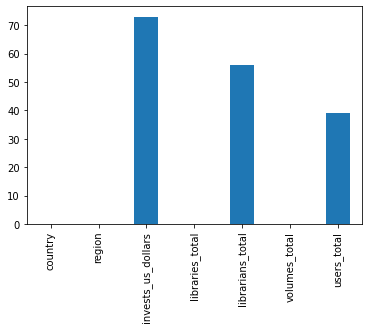

In [64]:
# Plotting missings
libraries.isna().sum().plot(kind = 'bar')
plt.show()

In [66]:
# We can remove rows that contain any missing values
libraries.dropna().head() # .dropna() function has some cool options!

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0
37,Cayman Islands,Latin America,3920.0,4,1.0,36970,284.0
38,Central African Republic,Africa,14275.0,5,3.0,55740,1500.0
79,Guadeloupe,Latin America,1409156.0,7,11.0,454700,3600.0


In [67]:
# Replacing NAs
libraries.fillna(0)

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total
137,Montserrat,Latin America,0.000000e+00,1,0.0,15000,0.0
7,Anguilla,Latin America,0.000000e+00,1,0.0,14000,0.0
64,Faroe Islands,Europe,2.322880e+05,2,6.0,464200,5600.0
63,Falkland Islands,Latin America,5.220200e+04,2,1.0,35000,500.0
203,Turks and Caicos Islands,Latin America,0.000000e+00,2,0.0,13000,0.0
...,...,...,...,...,...,...,...
209,United States,North America,2.175928e+10,101349,157685.0,2580863485,232107561.0
41,China,Asia,1.520004e+08,109673,58953.0,1063356687,16852456.0
165,Russia,Europe,5.375406e+07,113867,144123.0,1986072091,60104774.0
92,Indonesia,Asia,0.000000e+00,122906,0.0,11500045,4199674.0


In [53]:
# We can easily drop duplicates
libraries = libraries.drop_duplicates()
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,prop_books,sum_volumes,max_volumes
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN,NaN,15000,15000
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN,NaN,29000,15000
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0,83.0,493200,464200
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0,70.0,528200,464200
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN,NaN,541200,464200


In [54]:
# Dropping duplicates based on two conditions
libraries = libraries.drop_duplicates(['country', 'region'])
libraries.head()

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,prop_books,sum_volumes,max_volumes
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN,NaN,15000,15000
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN,NaN,29000,15000
64,Faroe Islands,Europe,232288.0,2,6.0,464200,5600.0,83.0,493200,464200
63,Falkland Islands,Latin America,52202.0,2,1.0,35000,500.0,70.0,528200,464200
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN,NaN,541200,464200


#### Counting text/factor variables

In [55]:
# Counting a column
count_region = libraries['region'].value_counts()
count_region

Africa           53
Europe           50
Latin America    46
Asia             36
Oceania          16
Middle East      14
North America     4
Name: region, dtype: int64

In [56]:
# Counting a column & sorting
count_region = libraries['region'].value_counts(sort = True)
count_region

Africa           53
Europe           50
Latin America    46
Asia             36
Oceania          16
Middle East      14
North America     4
Name: region, dtype: int64

In [57]:
# Counting a column & sorting & getting proportion
count_region = libraries['region'].value_counts(sort = True, normalize = True)
count_region

Africa           0.242009
Europe           0.228311
Latin America    0.210046
Asia             0.164384
Oceania          0.073059
Middle East      0.063927
North America    0.018265
Name: region, dtype: float64

### Looping over rows

In [58]:
for row, lab in libraries.iterrows() :
    print(row)
    print(lab)

137
country                  Montserrat
region                Latin America
invests_us_dollars              NaN
libraries_total                   1
librarians_total                NaN
volumes_total                 15000
users_total                     NaN
prop_books                      NaN
sum_volumes                   15000
max_volumes                   15000
Name: 137, dtype: object
7
country                    Anguilla
region                Latin America
invests_us_dollars              NaN
libraries_total                   1
librarians_total                NaN
volumes_total                 14000
users_total                     NaN
prop_books                      NaN
sum_volumes                   29000
max_volumes                   15000
Name: 7, dtype: object
64
country               Faroe Islands
region                       Europe
invests_us_dollars         232288.0
libraries_total                   2
librarians_total                6.0
volumes_total                464200
users_t

Name: 178, dtype: object
146
country                   Nicaragua
region                Latin America
invests_us_dollars        1772571.0
libraries_total                 456
librarians_total              184.0
volumes_total               1256331
users_total                 99948.0
prop_books                     13.0
sum_volumes               189581522
max_volumes                30753000
Name: 146, dtype: object
95
country                   Ireland
region                     Europe
invests_us_dollars    200357592.0
libraries_total               483
librarians_total            939.0
volumes_total            27994985
users_total             1742237.0
prop_books                   16.0
sum_volumes             217576507
max_volumes              30753000
Name: 95, dtype: object
125
country                    Mali
region                   Africa
invests_us_dollars       2112.0
libraries_total             506
librarians_total           16.0
volumes_total            388600
users_total           1

In [59]:
for row, lab in libraries.iterrows() :
    print(row, ':', lab.loc["country"])

137 : Montserrat
7 : Anguilla
64 : Faroe Islands
63 : Falkland Islands
203 : Turks and Caicos Islands
53 : Djibouti
119 : Macao
182 : Somalia
37 : Cayman Islands
68 : French Guiana
38 : Central African Republic
172 : São Tomé and Príncipe
204 : Tuvalu
167 : Saint Kitts and Nevis
128 : Martinique
196 : Timor-Leste
79 : Guadeloupe
104 : Kiribati
215 : Virgin Islands, British
69 : French Polynesia
8 : Antigua and Barbuda
107 : Kosovo
116 : Liechtenstein
49 : Curaçao
163 : Réunion
96 : Isle of Man
59 : Equatorial Guinea
202 : Turkmenistan
80 : Guam
144 : New Caledonia
217 : Yemen
127 : Marshall Islands
78 : Grenada
134 : Monaco
147 : Niger
54 : Dominica
83 : Guinea-Bissau
198 : Tonga
105 : North Korea
18 : Barbados
32 : Burundi
86 : Holy See (Vatican City)
132 : Micronesia
152 : Palau
169 : Saint Vincent and the Grenadines
171 : San Marino
166 : Rwanda
23 : Bermuda
4 : American Samoa
181 : Solomon Islands
11 : Aruba
168 : Saint Lucia
129 : Mauritania
5 : Andorra
29 : Brunei Darussalam
115 

In [60]:
for row, lab in libraries.iterrows() :
    libraries.loc[row, 'COUNTRY'] = lab['country'].upper()
    
libraries

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,prop_books,sum_volumes,max_volumes,COUNTRY
137,Montserrat,Latin America,NaN,1,NaN,15000,NaN,NaN,15000,15000,MONTSERRAT
7,Anguilla,Latin America,NaN,1,NaN,14000,NaN,NaN,29000,15000,ANGUILLA
64,Faroe Islands,Europe,2.322880e+05,2,6.0,464200,5600.0,83.0,493200,464200,FAROE ISLANDS
63,Falkland Islands,Latin America,5.220200e+04,2,1.0,35000,500.0,70.0,528200,464200,FALKLAND ISLANDS
203,Turks and Caicos Islands,Latin America,NaN,2,NaN,13000,NaN,NaN,541200,464200,TURKS AND CAICOS ISLANDS
...,...,...,...,...,...,...,...,...,...,...,...
209,United States,North America,2.175928e+10,101349,157685.0,2580863485,232107561.0,11.0,13099665424,3765041717,UNITED STATES
41,China,Asia,1.520004e+08,109673,58953.0,1063356687,16852456.0,63.0,14163022111,3765041717,CHINA
165,Russia,Europe,5.375406e+07,113867,144123.0,1986072091,60104774.0,33.0,16149094202,3765041717,RUSSIA
92,Indonesia,Asia,NaN,122906,NaN,11500045,4199674.0,3.0,16160594247,3765041717,INDONESIA


#### Replacing for loop for .apply(str.upper)

In [29]:
# The for loop was creating various series and then adding
# them to the df. Now, we'll create a one-liner for the same code above.
    
libraries['REGION'] = libraries['region'].apply(str.upper)

libraries

,country,region,invests_us_dollars,libraries_total,librarians_total,volumes_total,users_total,COUNTRY,REGION
1,Afghanistan,Asia,NaN,150,NaN,577300,48133.0,AFGHANISTAN,ASIA
2,Albania,Europe,134036.0,2107,32.0,12398795,581298.0,ALBANIA,EUROPE
3,Algeria,Africa,641176.0,760,56.0,4363718,1430.0,ALGERIA,AFRICA
4,American Samoa,Oceania,NaN,32,NaN,170009,NaN,AMERICAN SAMOA,OCEANIA
5,Andorra,Europe,5777651.0,39,6.0,222869,16596.0,ANDORRA,EUROPE
...,...,...,...,...,...,...,...,...,...
215,"Virgin Islands, British",Latin America,NaN,7,NaN,36000,8815.0,"VIRGIN ISLANDS, BRITISH",LATIN AMERICA
216,"Virgin Islands, U.S.",Latin America,NaN,45,NaN,495810,NaN,"VIRGIN ISLANDS, U.S.",LATIN AMERICA
217,Yemen,Middle East,NaN,12,NaN,360500,NaN,YEMEN,MIDDLE EAST
218,Zambia,Africa,6050.0,247,NaN,4226783,950.0,ZAMBIA,AFRICA
